In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types
from main.data_tools.query_dataframes import cut_dfs_4types



Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


In [6]:
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/Belle_study/ntuple_massvetov2_b2bii_stream10_5_presel/'
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/Belle_study/ntuple_massvetov2_b2bii_stream11_4_presel/'



In [7]:
Vgamma_ccbar = base_file_loc + 'charm/*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

Vgamma_uds = base_file_loc + 'uds/*.root'
Vgamma_charged = base_file_loc + 'charged/*.root'
Vgamma_mixed = base_file_loc + 'mixed/*.root'


In [8]:
base_filter=' D0_M>1.68 && D0_M<2.05'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526) < 0.125 && abs(Dstarp_delM-(2.0103-1.8648))<0.00046 && Dstarp_CMS_p>2.5'
base_filter+=' && gamma_E>0.42'

# cut value=(0.32, 0.52, 0.0008)
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal!=1'
# base_filter+='&& gamma_E>0.32 && Pi0_Prob2>0.52'
variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','Dstarp_chiProb','D0_M','D0_cosHel_0','Rho_M','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob2']
tree='rho'

In [9]:
# pd_Vgamma_ccbar = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter + ' && ',variables=variables)

pd_Vgamma_ccbar = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_uds = get_pd(file=Vgamma_uds, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_charged = get_pd(file=Vgamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_Vgamma_mixed = get_pd(file=Vgamma_mixed, tree=tree,base_filter=base_filter,variables=variables)


input_line_86:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_97:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<unsigned int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_112:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
IOStream.flush timed out
IOStream.flush timed out


In [10]:
# pd_ccbar_signal = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter + '&& Dstarp_isSignal==1',variables=variables)
# cut value=(0.32, 0.52, 0.0008)
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && Dstarp_CMS_p>2.5 && Dstarp_isSignal==1'
# base_filter+='&& gamma_E>0.32 && Pi0_Prob2>0.52'
# pd_ccbar_signal = get_pd(file=Vgamma_ccbar, tree=tree,base_filter=base_filter ,variables=variables)

In [11]:
pd_ccbar = pd_Vgamma_ccbar.reset_index(drop=True)
pd_uds = pd_Vgamma_uds.reset_index(drop=True)
pd_charged = pd_Vgamma_charged.reset_index(drop=True)
pd_mixed = pd_Vgamma_mixed.reset_index(drop=True)


In [12]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uds['rank'] = pd_uds.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')


In [13]:
# multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uds[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates())
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uds[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) 

print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

52695
51962
1.0141064624148417


In [14]:
# plt.hist(pd_ccbar.D0_M, bins=np.linspace(1.68,2.05,51));

# plt.hist(pd_ccbar_signal.D0_M, bins=np.linspace(1.68,2.05,51));

# plt.xlim(1.68,2.05)

In [15]:
cut = 'gamma_E>0.48 & Belle2Pi0Veto_75MeV >0.022'
cut = 'gamma_E>0.0'
# cut = 'rank==1'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uds,pd_charged, pd_mixed = cut_dfs_4types(cut, pd_ccbar, pd_uds,pd_charged, pd_mixed)

[764.86075949 733.11954993 725.44022504 720.8326301  726.97609001
 711.10548523 713.6652602  717.76090014 735.1673699  698.30661041
 713.1533052  709.05766526 691.6511955  716.22503516 722.88045007
 745.91842475 766.90857947 788.41068917 831.92686357 860.59634318
 845.74964838 834.48663854 776.12376934 686.01969058 604.1068917
 508.88326301 422.87482419 401.88466948 375.26300985 353.24894515
 341.47398031 373.72714487 343.52180028 313.3164557  340.96202532
 322.01969058 324.06751055 317.41209564 302.56540084 324.06751055
 316.90014065 301.02953586 325.60337553 292.32630098 301.02953586
 309.73277075 289.76652602 329.18706048 310.24472574 295.90998594]
fitst_bin_entries=764.8607594936631


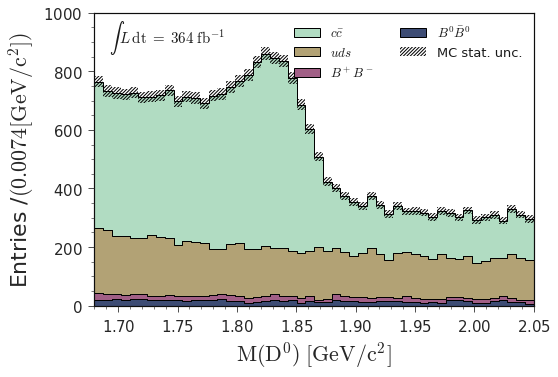

In [16]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


scale = 1
scale = 364/711

xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]", luminosity="$364\; \mathrm{fb}^{-1}$")
plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/belle_vs_belleII/generic/Belle_rho_4S_optimzied_nopi0veto_D0_stream11_4.png")
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/scaled_down_to_364_Belle_rho_4S_optimzied_nopi0veto_D0_stream11_4.png")


[ 747.45428973  718.27285513  689.09142053  707.52180028  778.17158931
  869.29957806  911.27988748 1063.33052039 1055.6511955   978.85794655
  808.3769339   664.00562588  515.02672293  474.07032349  432.09001406
  396.76511955  379.35864979  344.03375527  336.35443038  329.69901547
  320.4838256   313.82841069  311.26863572  296.42194093  296.42194093
  305.12517581  302.56540084  302.56540084  325.60337553  334.30661041
  307.68495077  335.84247539  351.71308017  356.8326301   346.08157525
  415.1954993   416.21940928  459.73558368  488.91701828  540.62447257
  616.90576653  672.70886076  661.44585091  644.03938115  625.60900141
  601.03516174  608.20253165  642.50351617  643.01547117  935.85372714]
fitst_bin_entries=747.4542897327641


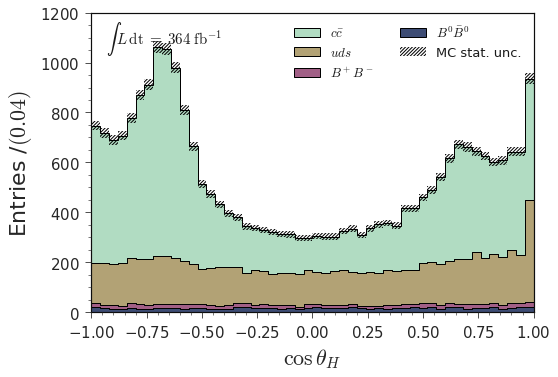

In [17]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_cosHel_0'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


scale = 1
scale = 364/711

xrange = (-1,1)
# xrange = (1.8,1.9)

nbins = 50
xlabel = r"$\cos\theta_H$"
luminosity="$364\; \mathrm{fb}^{-1}$"
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity)
plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/belle_vs_belleII/generic/Belle_rho_4S_optimzied_nopi0veto_cosHel_stream11_4.png")
plt.savefig("/home/belle2/jaeyoung/plots/2024_Jan_B2GM/scaled_down_to_364_Belle_rho_4S_optimzied_nopi0veto_cosHel_stream11_4.png")


[35557. 17870.  4765.  2273.  1064.]
fitst_bin_entries=35557.0


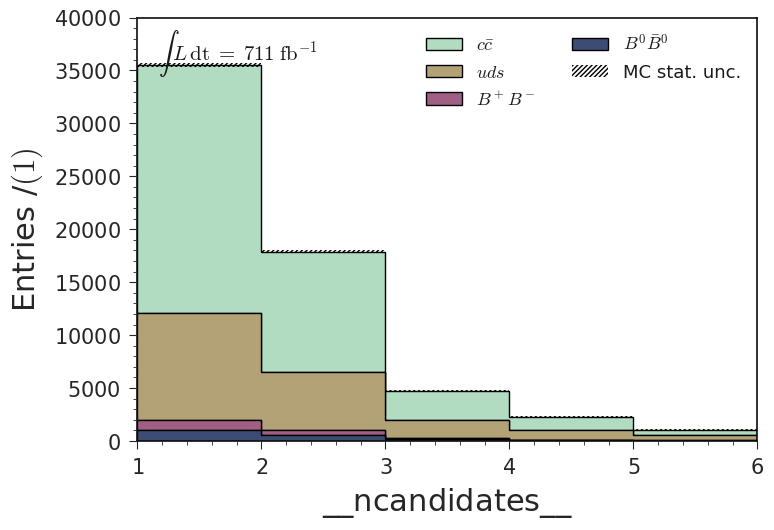

In [27]:
labels = [ r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$uds$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = '__ncandidates__'
data  = [pd_mixed[var], pd_charged[var],pd_uds[var], pd_ccbar[var]]  


scale = 1
xrange = (1,6)
force_range = (1,6)
# xrange = (1.8,1.9)

nbins = 5
xlabel = "__ncandidates__"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",force_range=force_range,luminosity=luminosity)
# plt.savefig("MC15rd_phi_1ab_optimized_ncandidates.png")